<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/goodnews_badnews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are questioning to see if greek journalism is interested mostly in good or bas news .
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
- unicodedata
</font>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import unicodedata

<br>
<font size="3">     
First of all we will find the 500 most popular words in all articles. From those words we will choose 10 positive words and 10 negative. We will create two dictionaries with the chosen words and each time an article has one of the selected words we will add by one our value in the dictionary and we will move on to the next article. Once we check all the articles we will see how many had good words in other words goon news and how many have bad. 
<br>
In the next block we define two functions:
    
- **find_top(x):** gets as input string all articles and returns the 500 top words.
- **plot_pie(x,y):** gets two numbers as input and produces a persentage pie.
</font>
<br>
<br>

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#get the article body
articles = list(df['article_body'])

#finction to find the 500 most common words
def find_top(articles):
    #initiate an empty list to save all the words of all the articles
    all_words_compined = []
    
    for words in articles:
        #split the articles to words
        word_list = words.split()
        #save the words to our list
        all_words_compined.extend(word_list)
        
    #find the 500 most common
    top = Counter(all_words_compined).most_common(500)
    return top


#function to plot in a pie two sizes
def plot_pie(pos_sum, neg_sum):
    # edit your labels
    labels = 'Good News', 'Bad News'
    sizes = [pos_sum, neg_sum]
    explode = (0, 0)
    fig1, ax1 = plt.subplots(figsize=(30,10))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 18})
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    
#show the 500 most common words
#top = find_top(articles)
#print(top)

<br>
<font size="3"> 
    
After finding the 500 most common words we choose the 10 positive and 10 negative ones.

</font>
<br>
<br>

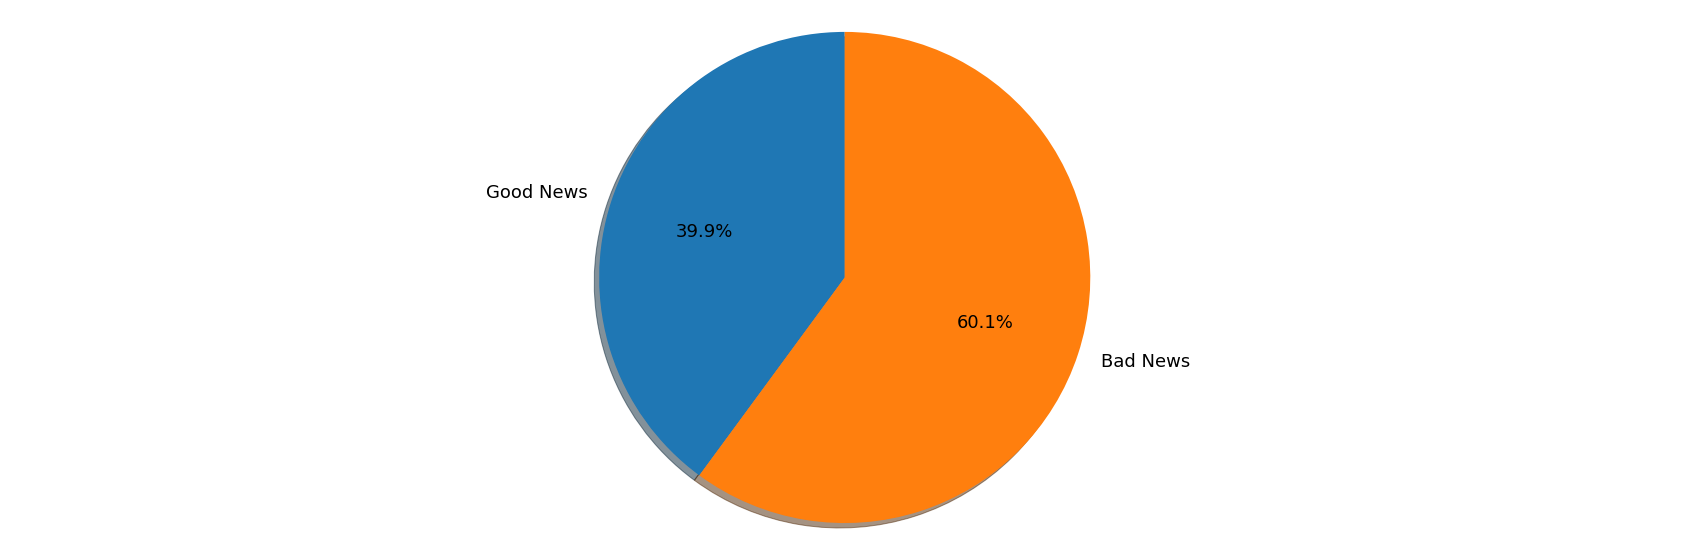

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#we will create two lists one with possitive meaning words and one with negative ones
pos = ['τουρισμου','αναπτυξη', 'ανακαμψης', 'αισιοδοξα','καλος','χαρα','προσληψεις','εγκαινιαστηκε','ανακαλυψη','επιτυχια']
neg = ['μειωση','κρισης', 'προβλημα', 'ανησυχια','λυπη','συγχυση','επιθεση','πονο','υφεση','ακυρωση']


#transform lists to dicts with zero value
pos_dict = {k:0 for k in pos}
neg_dict = {k:0 for k in neg}


for x in df['article_body']:
    #get a the article splitted by words in a list
    article = x
    article_list = x.split()
    #rotate over each dict key and count the times it is appeared
    for y in pos_dict:
        res = re.search(rf"\b(?=\w){y}(?!\w)", article, re.IGNORECASE)
        if res != None:
            pos_dict.update({y:pos_dict[y]+1})
            break
    for y in neg_dict:
        res = re.search(rf"\b(?=\w){y}(?!\w)", article, re.IGNORECASE)
        if res != None:
            neg_dict.update({y:neg_dict[y]+1})
            break
#calculate the number of each bad and good articles by adding the values in each dict    
pos_sum = sum(pos_dict.values())
neg_sum = sum(neg_dict.values())

#plot the results
plot_pie(pos_sum, neg_sum)